In [9]:
import tqdm 
import json
import os

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import stanza

## Global statistic on the corpus
In this notebook we explore simple statistic on the corpus questions and answers:
* Explore the distribution of the questions words (How, Why,...)
* Explore some Statistic on the length of questions and answers according to the categorie

As in other files, you should give the data path folder in `data_path` variable


In [10]:
data_path = '../data/'
# Loading nlp stanza module in french (tokenization and lemmatization)
nlp = stanza.Pipeline(lang='fr', processors='tokenize,lemma,mwt')

In [11]:
with open(os.path.join(data_path, 'v2/cquae-annotation.json'), 'r') as f:
    annotation_v1 = {d['qid']: d for d in json.load(f)}
with open(os.path.join(data_path, 'v1/cquae-document.json'), 'r') as f:
    documents = {d['did']: d for d in json.load(f)}

In [ ]:
# A dictionary to map start of sentence with interogative words
interogative = {
    'par qui': 'par qui',
    'que': 'que',
    'jusque ou' : 'où',
    'jusque où' : 'où',
    'de où' : 'où',
    'de ou': 'où',
    'pour quel': 'pour quel',
    'quel': 'quel',
    'avoir quel' : 'à quel',
    'à quel' : 'à quel',
    'dans quel': 'dans quel',
    'de quel': 'de quel',
    'combien': 'combien',
    'de combien': 'combien',
    'en quel' : 'en quel',
    'quand': 'quand', 
    'de quand': 'quand',
    'qui': 'qui',
    'définissez': 'définir',
    'définisser': 'définir',
    'definir': 'définir',
    'avoir qui' : 'à qui',
    'à qui': 'à qui',
    'de quoi': 'de quoi',
    'en quoi': 'en quoi',
    'par quoi': 'par quoi',
    'par qui': 'par qui',
    'par où': 'par où',
    'par ou': 'par où',
    'par quel': 'par quel',
    'quoi': 'quoi',
    'avoir quoi': 'à quoi',
    'à quoi': 'à quoi',
    'que être ce': 'qu\'est-ce',
    'que être ce qui': 'qu\'est-ce-qui',
    'expliquer': 'expliquez',
    'explique': 'expliquez',
    'expliquez': 'expliquez',
    'décrivez': 'décrire',
    'pouvoir on': 'peut-on',
    'peut-on': 'peut-on',
    'décrire': 'décrire',
    'définir': 'définir',
    'avoir quoi': 'à quoi',
    'à quoi': 'à quoi',
    'sur quel':'sur quel',
    'sur quoi': 'sur quoi',
    'sur qui': 'sur qui',
    'depuis quand': 'quand',
    'depuis quel': 'depuis quel',
    'comment': 'comment',
    'pourquoi': 'pourquoi',
    'ou': 'où',
    'où': 'où',
    'être ce que': 'est-ce que',
    'qu\'est-ce': 'qu\'est-ce',
    'avoir quand': 'quand',
    'à quand': 'quand',
    'être ce': 'est-ce',
    'lequel': 'lequel'
}

def get_question_df(annotations, documents):
    df_data = {
        "question" : [],
        "start_lemma" : [],
        "qtype": [],
        "source": [],
        "answer": []
    }
    qtype_map = {'factual': 'factual', 'raisoning': 'synthesis', 'definition': 'definition', 'course': 'course' }
    for qid, annotation in tqdm.notebook.tqdm(annotations.items()):
        question = annotation['question']
        sent_nlp = nlp(question.replace('-', ' '))
        lemmatized = ' '.join([i.lemma.lower() for i in sent_nlp.iter_words()])
        interogative_words = 'other'
        for i in interogative:
            if(lemmatized.startswith(i)):
                interogative_words = interogative[i]
        did = annotation['did']
        source = "lelivrescolaire" if('lelivrescolaire' in documents[did]['url']) else "wikipedia"
        question_type = qtype_map[annotation['question_type']]
        answer = annotation['answer']
        df_data['question'].append(question)
        df_data['answer'].append(answer)
        df_data['start_lemma'].append(interogative_words)
        df_data['qtype'].append(question_type)
        df_data['source'].append(source)
    
    return pd.DataFrame(df_data)

qdf_v1 = get_question_df(annotation_v1, documents)

  0%|          | 0/7986 [00:00<?, ?it/s]

In [ ]:
qdf_v1.to_csv(os.path.join(os.environ['ROOT_PATH'], 'v2/cquae-query-words.csv'))

In [ ]:
qdf_v1

question start_lemma  \
0                               Qui est Madame Roland ?         qui   
1        Quel est le nom de naissance de Manon Roland ?        quel   
2     Comment Manon Roland s'est-elle impliquée dans...     comment   
3     Comment visualiser les molécules contenues dan...     comment   
4                            Qu'est-ce qu'un organite ?   qu'est-ce   
...                                                 ...         ...   
7981  A quelle date la population française rurale é...      à quel   
7982  En quelle année la France devient majoritairem...     en quel   
7983  Quelles ont été les causes de la diminution de...        quel   
7984  Quand a eu lieu le dernier mouvement d'exode r...       quand   
7985                   Qu'est ce que la rurbanisation ?   qu'est-ce   

           qtype           source  \
0         course  lelivrescolaire   
1        factual  lelivrescolaire   
2         course  lelivrescolaire   
3        factual  lelivrescolaire   
4     definition  lelivrescolaire   
...          ...              ...   
7981     factual        wikipedia   
7982     factual        wikipedia   
7983   synthesis        wikipedia   
7984      course        wikipedia   
7985  definition        wikipedia   

                                                 answer  
0     Manon Roland (1754-1793) est une femme issue d...  
1     Le nom de naissance de Madame Roland est Phlipon.  
2     Manon Roland s'est impliquée dans la Révolutio...  
3     Grace à des technologies récentes, notamment l...  
4     Un organite est une structure intracellulaire ...  
...                                                 ...  
7981  C'est entre 1850 et 1860 que la population rur...  
7982  C'est en 1931 que la population urbaine devien...  
7983  Ce déclin de la population rurale s'explique d...  
7984  Le dernier mouvement d'exode rural a commencé ...  
7985  La rurbanisation désigne le fait pour des cita...  

[7986 rows x 5 columns]

In [ ]:

def process_qtype(df,qtype):
    definition = df[df['qtype'] == qtype].groupby('start_lemma').count().sort_values('source')/ len(df[df['qtype'] == qtype])
    labels = []
    sizes = []
    for label, size in zip(definition.index, definition['source']):
        if( size > 0.02 and label != "other"):
            labels.append(label)
            sizes.append(size)
    sizes.append(1 - np.sum(sizes))
    labels.append('autre')
    return sizes, labels


               question     qtype    source    answer
start_lemma                                          
dans quel      0.000766  0.000766  0.000766  0.000766
de quoi        0.000766  0.000766  0.000766  0.000766
qu'est-ce-qui  0.000766  0.000766  0.000766  0.000766
quand          0.000766  0.000766  0.000766  0.000766
à quoi         0.001533  0.001533  0.001533  0.001533
pourquoi       0.002299  0.002299  0.002299  0.002299
en quoi        0.003831  0.003831  0.003831  0.003831
définir        0.006897  0.006897  0.006897  0.006897
qui            0.009962  0.009962  0.009962  0.009962
other          0.011494  0.011494  0.011494  0.011494
quel           0.042146  0.042146  0.042146  0.042146
comment        0.050575  0.050575  0.050575  0.050575
que            0.242912  0.242912  0.242912  0.242912
qu'est-ce      0.625287  0.625287  0.625287  0.625287
               question     qtype    source    answer
start_lemma                                          
dans quel      0.000766  0.0

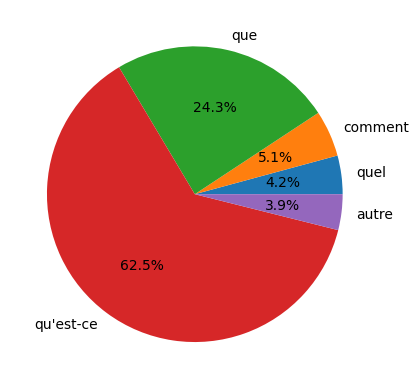

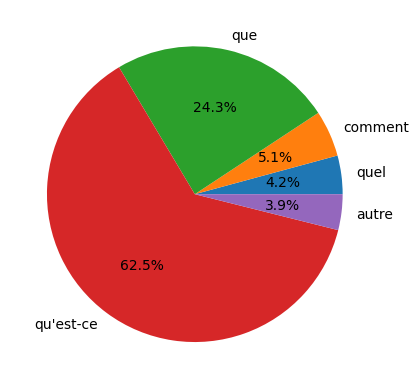

In [ ]:
fig, ax = plt.subplots()
qtype = "definition"
sizes, labels = process_qtype(qdf_v1, qtype)
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
fig.savefig(os.path.join(os.environ['ROOT_PATH'], 'v2/'+qtype+".svg"), format='svg')

fig, ax = plt.subplots()
qtype = "definition"
sizes, labels = process_qtype(qdf_v1, qtype)
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
fig.savefig(os.path.join(os.environ['ROOT_PATH'], 'v2/'+qtype+".pdf"), format='pdf', bbox_inches='tight')

               question     qtype    source    answer
start_lemma                                          
pour quel      0.000616  0.000616  0.000616  0.000616
depuis quel    0.000616  0.000616  0.000616  0.000616
de quoi        0.001232  0.001232  0.001232  0.001232
sur quoi       0.001848  0.001848  0.001848  0.001848
par quel       0.001848  0.001848  0.001848  0.001848
en quoi        0.001848  0.001848  0.001848  0.001848
à quoi         0.001848  0.001848  0.001848  0.001848
à qui          0.002465  0.002465  0.002465  0.002465
sur quel       0.003081  0.003081  0.003081  0.003081
qu'est-ce      0.005545  0.005545  0.005545  0.005545
par qui        0.005545  0.005545  0.005545  0.005545
pourquoi       0.006161  0.006161  0.006161  0.006161
de quel        0.009858  0.009858  0.009858  0.009858
que            0.009858  0.009858  0.009858  0.009858
qu'est-ce-qui  0.009858  0.009858  0.009858  0.009858
comment        0.024030  0.024030  0.024030  0.024030
dans quel      0.029575  0.0

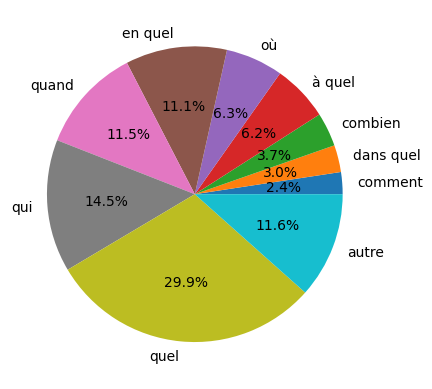

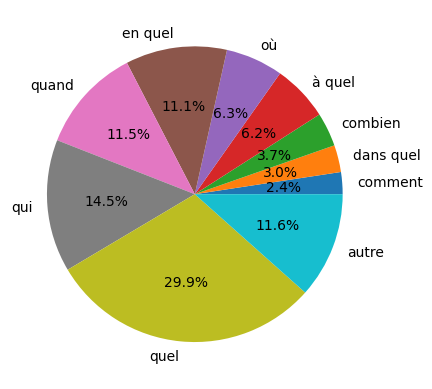

In [ ]:
fig, ax = plt.subplots()
qtype = "factual"
sizes, labels = process_qtype(qdf_v1, qtype)
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
fig.savefig(os.path.join(os.environ['ROOT_PATH'], 'v2/'+qtype+".svg"), format='svg')

fig, ax = plt.subplots()
qtype = "factual"
sizes, labels = process_qtype(qdf_v1, qtype)
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
fig.savefig(os.path.join(os.environ['ROOT_PATH'], 'v2/'+qtype+".pdf"), format='pdf', bbox_inches='tight')

               question     qtype    source    answer
start_lemma                                          
lequel         0.000280  0.000280  0.000280  0.000280
par qui        0.000559  0.000559  0.000559  0.000559
décrire        0.000559  0.000559  0.000559  0.000559
à qui          0.001118  0.001118  0.001118  0.001118
expliquez      0.001118  0.001118  0.001118  0.001118
par quoi       0.001398  0.001398  0.001398  0.001398
est-ce         0.001398  0.001398  0.001398  0.001398
en quel        0.001398  0.001398  0.001398  0.001398
sur quoi       0.002237  0.002237  0.002237  0.002237
sur quel       0.002516  0.002516  0.002516  0.002516
par quel       0.003075  0.003075  0.003075  0.003075
à quel         0.004193  0.004193  0.004193  0.004193
quand          0.005591  0.005591  0.005591  0.005591
où             0.005591  0.005591  0.005591  0.005591
pour quel      0.005591  0.005591  0.005591  0.005591
de quoi        0.006150  0.006150  0.006150  0.006150
de quel        0.006150  0.0

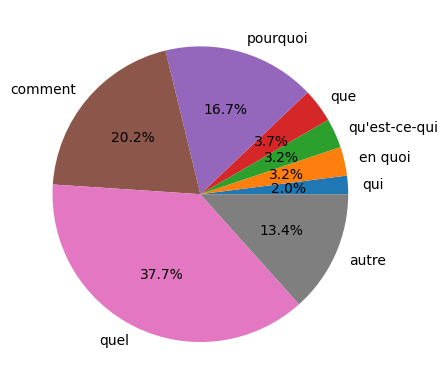

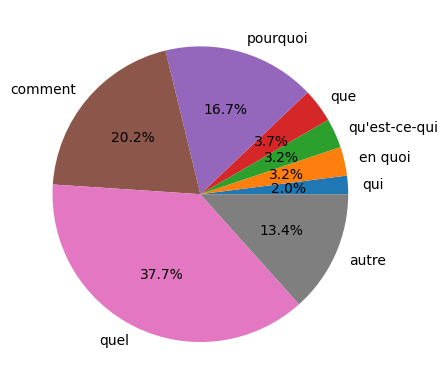

In [ ]:
fig, ax = plt.subplots()
qtype = "course"
sizes, labels = process_qtype(qdf_v1, qtype)
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
fig.savefig(os.path.join(os.environ['ROOT_PATH'], 'v2/'+qtype+".svg"), format='svg')

fig, ax = plt.subplots()
qtype = "course"
sizes, labels = process_qtype(qdf_v1, qtype)
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
fig.savefig(os.path.join(os.environ['ROOT_PATH'], 'v2/'+qtype+".pdf"), format='pdf', bbox_inches='tight')

               question     qtype    source    answer
start_lemma                                          
à quoi         0.000675  0.000675  0.000675  0.000675
sur quel       0.000675  0.000675  0.000675  0.000675
à qui          0.000675  0.000675  0.000675  0.000675
expliquez      0.000675  0.000675  0.000675  0.000675
par quel       0.001350  0.001350  0.001350  0.001350
peut-on        0.001350  0.001350  0.001350  0.001350
de quoi        0.001350  0.001350  0.001350  0.001350
en quel        0.001350  0.001350  0.001350  0.001350
est-ce         0.002026  0.002026  0.002026  0.002026
sur quoi       0.002026  0.002026  0.002026  0.002026
où             0.003376  0.003376  0.003376  0.003376
pour quel      0.005402  0.005402  0.005402  0.005402
quand          0.005402  0.005402  0.005402  0.005402
à quel         0.006077  0.006077  0.006077  0.006077
qui            0.006077  0.006077  0.006077  0.006077
de quel        0.006752  0.006752  0.006752  0.006752
dans quel      0.012154  0.0

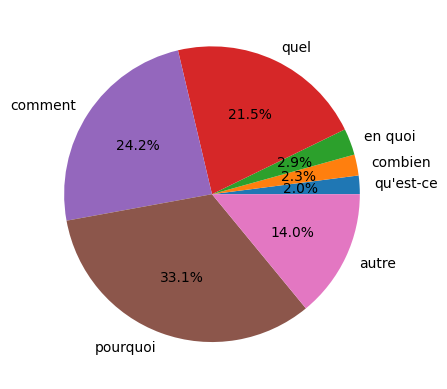

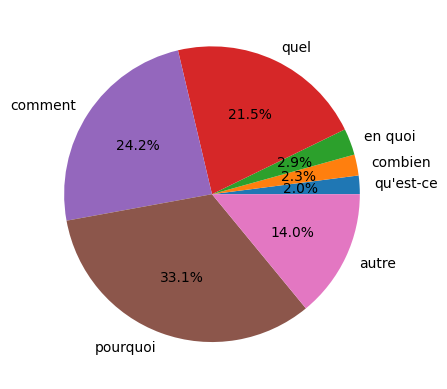

In [48]:
fig, ax = plt.subplots()
qtype = "synthesis"
sizes, labels = process_qtype(qdf_v1, qtype)
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
fig.savefig(os.path.join(os.environ['ROOT_PATH'], 'v2/'+qtype+".svg"), format='svg')

fig, ax = plt.subplots()
qtype = "synthesis"
sizes, labels = process_qtype(qdf_v1, qtype)
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
fig.savefig(os.path.join(os.environ['ROOT_PATH'], 'v2/'+qtype+".pdf"), format='pdf', bbox_inches='tight')

In [49]:
sizes, labels = process_qtype(qdf_v1, qtype)

               question     qtype    source    answer
start_lemma                                          
à quoi         0.000675  0.000675  0.000675  0.000675
sur quel       0.000675  0.000675  0.000675  0.000675
à qui          0.000675  0.000675  0.000675  0.000675
expliquez      0.000675  0.000675  0.000675  0.000675
par quel       0.001350  0.001350  0.001350  0.001350
peut-on        0.001350  0.001350  0.001350  0.001350
de quoi        0.001350  0.001350  0.001350  0.001350
en quel        0.001350  0.001350  0.001350  0.001350
est-ce         0.002026  0.002026  0.002026  0.002026
sur quoi       0.002026  0.002026  0.002026  0.002026
où             0.003376  0.003376  0.003376  0.003376
pour quel      0.005402  0.005402  0.005402  0.005402
quand          0.005402  0.005402  0.005402  0.005402
à quel         0.006077  0.006077  0.006077  0.006077
qui            0.006077  0.006077  0.006077  0.006077
de quel        0.006752  0.006752  0.006752  0.006752
dans quel      0.012154  0.0

In [58]:
qtype = "synthesis"
distrib_s = qdf_v1[qdf_v1['qtype'] == qtype].groupby('start_lemma').count().sort_values('source')/ len(qdf_v1[qdf_v1['qtype'] == qtype])
qtype = "factual"
distrib_f = qdf_v1[qdf_v1['qtype'] == qtype].groupby('start_lemma').count().sort_values('source')/ len(qdf_v1[qdf_v1['qtype'] == qtype])
qtype = "definition"
distrib_d = qdf_v1[qdf_v1['qtype'] == qtype].groupby('start_lemma').count().sort_values('source')/ len(qdf_v1[qdf_v1['qtype'] == qtype])
qtype = "course"
distrib_c = qdf_v1[qdf_v1['qtype'] == qtype].groupby('start_lemma').count().sort_values('source')/ len(qdf_v1[qdf_v1['qtype'] == qtype])

In [68]:
vocabulary = set(interogative.values())
vocabulary

{'combien',
 'comment',
 'dans quel',
 'de quel',
 'de quoi',
 'depuis quel',
 'décrire',
 'définir',
 'en quel',
 'en quoi',
 'est-ce',
 'est-ce que',
 'expliquez',
 'lequel',
 'où',
 'par où',
 'par quel',
 'par qui',
 'par quoi',
 'peut-on',
 'pour quel',
 'pourquoi',
 "qu'est-ce",
 "qu'est-ce-qui",
 'quand',
 'que',
 'quel',
 'qui',
 'quoi',
 'sur quel',
 'sur qui',
 'sur quoi',
 'à quel',
 'à qui',
 'à quoi'}

In [92]:
qdf_distrib_fquad = pd.read_csv('fquad_qword_distrib.csv')
qdf_distrib_piaf = pd.read_csv('piaf_qword_distrib.csv')

In [93]:
data_distrib = { 
        "factual":[],
        "definition": [],
        "course":[],
        "synthesis": [],
        "fquad": [],
        "piaf": []}
for word in vocabulary:
    for k, df in {
        "factual": distrib_f,
        "definition": distrib_d,
        "course": distrib_c,
        "synthesis": distrib_s,
        "fquad": qdf_distrib_fquad.set_index("start_lemma"),
        "piaf": qdf_distrib_piaf.set_index("start_lemma")
    }.items():
        try:
            prob = df.loc[word]['question']
            print(prob)
            data_distrib[k].append(prob)
        except: 
            data_distrib[k].append(0.)
        

0.0006161429451632779
0.005591277606933185
0.0054017555705604325
0.0099920565241021
0.0057458803122289
0.005545286506469501
0.6252873563218391
0.019849035504612804
0.02025658338960162
0.0097830176846858
0.0151777970511708
0.006896551724137931
0.029574861367837338
0.0007662835249042146
0.009505171931786413
0.012153950033760972
0.0290563986788745
0.0235255854293148
0.024029574861367836
0.05057471264367816
0.20156555772994128
0.24172856178257934
0.0587817216438814
0.0585429314830876
0.0013978194017332962
0.0053513942890589
0.0019514310494362
0.0013978194017332962
0.002025658338960162
8.361553576654542e-05
0.0044449262792714
0.2988293284041898
0.0421455938697318
0.37685211070729663
0.21471978392977717
0.2908566411639282
0.2769947961838682
0.009858287122612447
0.0061504053676265024
0.00675219446320054
0.0214473849241189
0.0179965307892454
0.1447935921133703
0.00996168582375479
0.020128599384959464
0.006076975016880486
0.1159329403403152
0.1222896790980052
0.0018484288354898336
0.00383141762

In [94]:
from scipy.stats import chisquare, pearsonr

In [95]:
for k1 in ['factual', 'definition', 'course', 'synthesis', 'piaf', 'fquad']:
    for k2 in ['factual', 'definition', 'course', 'synthesis', 'piaf', 'fquad']:
        stat, pval = pearsonr(data_distrib[k1], data_distrib[k2])
        print(k1, k2, stat, pval)
        

factual factual 1.0 0.0
factual definition -0.02407556208786912 0.8908095690462987
factual course 0.6506106155102683 2.324010397495544e-05
factual synthesis 0.33121269386545454 0.05194708383815019
factual piaf 0.9340548690024015 2.5732070552265183e-16
factual fquad 0.9247998358506291 2.095274511355169e-15
definition factual -0.02407556208786912 0.8908095690462987
definition definition 0.9999999999999999 0.0
definition course 0.07419538597481579 0.6718654420257926
definition synthesis 0.044490463498192634 0.7996688933800307
definition piaf 0.06952061256243466 0.6914903917969216
definition fquad 0.06000036540348113 0.732061774839254
course factual 0.6506106155102683 2.324010397495544e-05
course definition 0.07419538597481579 0.6718654420257926
course course 0.9999999999999999 0.0
course synthesis 0.8528587724038218 7.780225663868311e-11
course piaf 0.8015891402302003 7.1933076415708095e-09
course fquad 0.802012992421742 6.967539487107428e-09
synthesis factual 0.33121269386545454 0.051947

In [72]:
qdf_distrib_piaf.set_index("start_lemma")

question
start_lemma            
combien        0.054266
comment        0.058782
dans quel      0.029056
de quel        0.021447
de quoi        0.011455
depuis quel    0.000460
en quel        0.023998
en quoi        0.003303
est-ce         0.000084
lequel         0.000042
other          0.086542
où             0.043815
par où         0.000293
par quel       0.002634
par qui        0.004055
par quoi       0.005351
peut-on        0.000042
pour quel      0.009992
pourquoi       0.019859
qu'est-ce      0.009783
qu'est-ce-qui  0.022743
quand          0.064509
que            0.062503
quel           0.290857
qui            0.115933
sur quel       0.005853
sur qui        0.000293
sur quoi       0.004055
à quel         0.026255
à qui          0.009114
à quoi         0.012626

In [ ]:
qdf_distrib_synthesis = qdf_FQuAD.groupby('start_lemma').count()/len(qdf_FQuAD)
qdf_distrib_synthesis.to_csv('synthesis_qword_distrib.csv')

# Comparison with FQuAD and PIAF dataset

In [25]:
import json

with open(os.path.join(os.environ['ROOT_PATH'], 'taln-2024/FQuAD/train.json'), 'r') as f:
    fquad = json.load(f)['data']
with open(os.path.join(os.environ['ROOT_PATH'], 'taln-2024/FQuAD/valid.json'), 'r') as f:
    fquad +=  json.load(f)['data']
with open(os.path.join(os.environ['ROOT_PATH'], 'taln-2024/PIAF/piaf-v1.2.json'), 'r') as f:
    piaf = json.load(f)

In [26]:
fquad_quest = []
fquad_answer = []
for p in fquad:
    for par in p['paragraphs']:
        for qas in par['qas']:
            fquad_quest.append(qas['question'])
            fquad_answer.append(qas['answers'][0]['text'])


piaf_quest = []
piaf_answer = []

for p in piaf['data']:
    for par in p['paragraphs']:
        for qas in par['qas']:
            piaf_quest.append(qas['question'])
            piaf_answer.append(qas['answers'][0]['text'])

piaf_df = pd.DataFrame({'question': piaf_quest, 'answer': piaf_answer})
piaf_df['qlen'], piaf_df['alen'] = [len(q.strip().split()) for q in  piaf_df['question']], [len(a.strip().split()) for a in  piaf_df['answer']]

fquad_df = pd.DataFrame({'question': fquad_quest, 'answer': fquad_answer})
fquad_df['qlen'], fquad_df['alen'] = [len(q.strip().split()) for q in  fquad_df['question']], [len(a.strip().split()) for a in  fquad_df['answer']]


In [20]:
piaf_df

question  \
0     Combien de personnes travaillent au ministère ...   
1                                  Combien d'employeurs   
2                       Quel part du budget des ménages   
3                                  Quel montant en 2003   
4                                  Quel montant en 2019   
...                                                 ...   
9219             Quelle est la singularité des orques ?   
9220                De quoi se nourrissent les orques ?   
9221  En cas de disette, de quoi sont capables les o...   
9222  malgré leur cruauté , quel rang militaire occu...   
9223  Quelles sont les puissances qui emploient des ...   

                      answer  qlen  alen  
0                    100 000     8     2  
1                     20 000     2     2  
2                         50     6     1  
3     14,2 milliards d'euros     4     3  
4               12 milliards     4     2  
...                      ...   ...   ...  
9219      mœurs sanguinaires     7     2  
9220           chair humaine     7     2  
9221            cannibalisme    10     1  
9222              fantassins    10     1  
9223   puissances maléfiques    11     2  

[9224 rows x 4 columns]

## Compare the question length 

In [21]:
qdf_v1['qlen'], qdf_v1['alen'] = [len(q.strip().split()) for q in  qdf_v1['question']], [len(a.strip().split()) for a in  qdf_v1['answer']]
course = qdf_v1[qdf_v1['qtype'] == 'course']
definition = qdf_v1[qdf_v1['qtype'] == 'definition']
synthesis = qdf_v1[qdf_v1['qtype'] == 'synthesis']
factual = qdf_v1[qdf_v1['qtype'] == 'factual']



In [22]:
from matplotlib import pyplot as plt

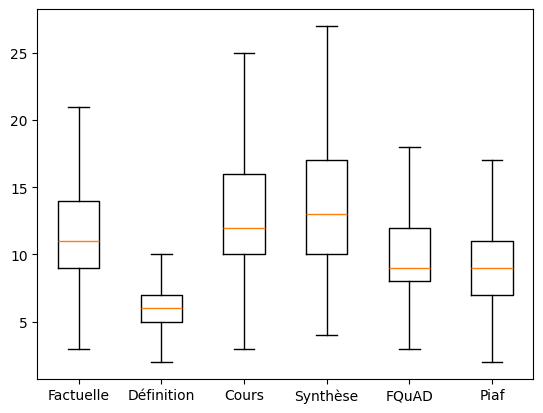

In [23]:
plt.boxplot([factual['qlen'], definition['qlen'],  course['qlen'], synthesis['qlen'], fquad_df['qlen'], piaf_df['qlen'] ], 
            sym='', labels=['Factuelle', 'Définition', 'Cours', 'Synthèse', 'FQuAD', 'Piaf'])

plt.savefig(os.path.join(os.environ['ROOT_PATH'], 'taln-2024/comparison/question_comparison.pdf'), format='pdf')

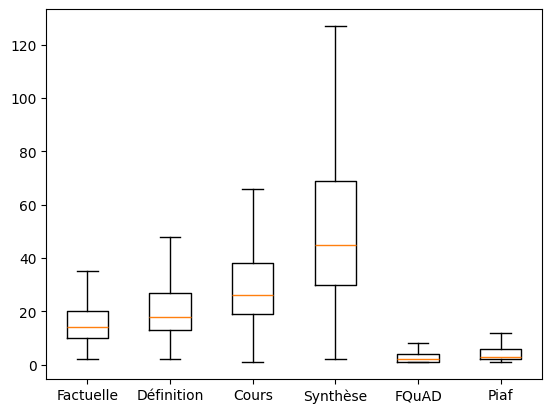

In [24]:
plt.boxplot([factual['alen'], definition['alen'],  course['alen'], synthesis['alen'], fquad_df['alen'], piaf_df['alen'] ], 
            sym='', labels=['Factuelle', 'Définition', 'Cours', 'Synthèse', 'FQuAD', 'Piaf'])

plt.savefig(os.path.join(os.environ['ROOT_PATH'], 'taln-2024/comparison/answer_comparison.pdf'), format='pdf')

# Comparison FQUAD PIAF QUESTION

In [27]:
def get_question_df(annotations):
    df_data = {
        "question" : [],
        "start_lemma": []
    }
    qtype_map = {'factual': 'factual', 'raisoning': 'synthesis', 'definition': 'definition', 'course': 'course' }
    for qid, question in tqdm.notebook.tqdm(enumerate(annotations)):
        #question = annotation[qid]
        sent_nlp = nlp(question.replace('-', ' '))
        lemmatized = ' '.join([i.lemma.lower() for i in sent_nlp.iter_words()])
        interogative_words = 'autre'
        for i in interogative:
            if(lemmatized.startswith(i)):
                interogative_words = interogative[i]

        df_data['question'].append(question)
        df_data['start_lemma'].append(interogative_words)
    return pd.DataFrame(df_data)

In [28]:
qdf_FQuAD = get_question_df(fquad_quest)
#qdf_PIAF = get_question_df(annotation_v1, documents)

0it [00:00, ?it/s]

In [29]:
qdf_PIAF = get_question_df(piaf_quest)


0it [00:00, ?it/s]

In [30]:
fquad_quest

["Quel astronome a émit l'idée en premier d'une planète entre les orbites de Mars et Jupiter ?",
 'Quel astronome découvrit Uranus ?',
 'Quelles furent les découvertes finales des vingt-quatre astronomes ?',
 'Quelles furent les découvertes finales des vingt-quatre astronomes ?',
 'Combien de fois Piazzi est-il parvenu à observer Cérès ?',
 'Où se trouvait Barnaba Oriani en 1801 ?',
 'Dans quel revue scientifique fut publiées ces observations complètes ?',
 "Pourquoi Cérès n'était pas directement assimilable à une comète ?",
 'Pour quelle raison on ne put plus observer Cérès ?',
 'Qui est parvenu à déterminer approximativement la position de Cérès ?',
 'Quelle méthode fut utilisée pour retrouver la position de Cérès ?',
 'Quel poste occupait Franz Xaver von Zach ?',
 'Pour quelles raisons seule la première partie du nom fut conservée ?',
 'Quel est le nom grec de Cérès ?',
 'Quel nom eut Cérès pendant un court moment en Allemagne ?',
 "Qu'est-ce qui résulte de la désignation des planèt

In [31]:

def process_qtype(df):
    definition = df.groupby('start_lemma').count().sort_values("question")/ len(df)
    labels = []
    sizes = []
    print(definition)
    for label, size in zip(definition.index, definition['question']):
        if( size > 0.02 and label != "autre"):
            labels.append(label)
            sizes.append(size)

    sizes.append(1 - np.sum(sizes))
    labels.append('autre')
    return sizes, labels


In [32]:
qdf_FQuAD

question start_lemma
0      Quel astronome a émit l'idée en premier d'une ...        quel
1                      Quel astronome découvrit Uranus ?        quel
2      Quelles furent les découvertes finales des vin...        quel
3      Quelles furent les découvertes finales des vin...        quel
4      Combien de fois Piazzi est-il parvenu à observ...     combien
...                                                  ...         ...
23914  A quel risque la zone où se situe la chapelle ...      à quel
23915  Comment était disposés les murets par rapport ...     comment
23916       En quelle matière sont les dalles du canal ?     en quel
23917                  Par quoi le canal est-il doublé ?    par quoi
23918             A quoi devaient servir les terrasses ?      à quoi

[23919 rows x 2 columns]

In [33]:
! echo $ROOT_PATH

/home/gerald/Documents/RESEARCH/cquae-internal/data/


               question
start_lemma            
lequel         0.000042
peut-on        0.000042
est-ce         0.000084
sur qui        0.000293
par où         0.000293
depuis quel    0.000460
par quel       0.002634
en quoi        0.003303
sur quoi       0.004055
par qui        0.004055
par quoi       0.005351
sur quel       0.005853
à qui          0.009114
qu'est-ce      0.009783
pour quel      0.009992
de quoi        0.011455
à quoi         0.012626
pourquoi       0.019859
de quel        0.021447
qu'est-ce-qui  0.022743
en quel        0.023998
à quel         0.026255
dans quel      0.029056
où             0.043815
combien        0.054266
comment        0.058782
que            0.062503
quand          0.064509
autre          0.086542
qui            0.115933
quel           0.290857
               question
start_lemma            
lequel         0.000042
peut-on        0.000042
est-ce         0.000084
sur qui        0.000293
par où         0.000293
depuis quel    0.000460
par quel       0

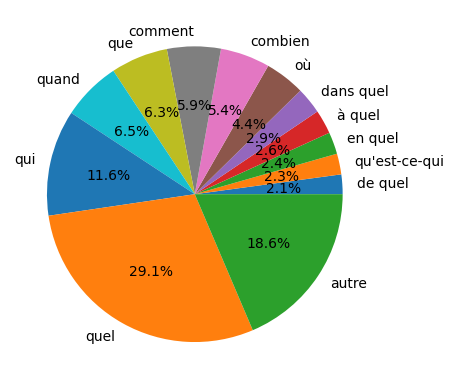

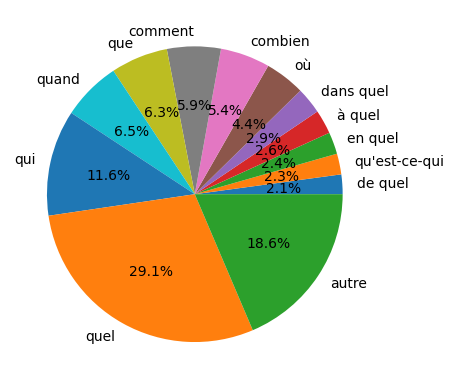

In [34]:
fig, ax = plt.subplots()
sizes, labels = process_qtype(qdf_FQuAD)
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
fig.savefig(os.path.join(os.environ['ROOT_PATH'], 'v1/fquad.svg'), format='svg')

fig, ax = plt.subplots()
sizes, labels = process_qtype(qdf_FQuAD)
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
fig.savefig(os.path.join(os.environ['ROOT_PATH'], 'v1/fquad.pdf'), format='pdf', bbox_inches='tight')

               question
start_lemma            
décrire        0.000108
lequel         0.000108
depuis quel    0.000217
par où         0.000217
sur qui        0.000325
peut-on        0.000542
par quoi       0.001951
par quel       0.002710
en quoi        0.002927
sur quoi       0.003036
est-ce         0.004445
par qui        0.005312
sur quel       0.005746
pour quel      0.005746
de quoi        0.006180
à qui          0.006180
à quoi         0.009649
qu'est-ce      0.015178
qu'est-ce-qui  0.016045
de quel        0.017997
dans quel      0.023526
pourquoi       0.023634
en quel        0.027971
à quel         0.029705
où             0.047810
combien        0.049436
que            0.051713
quand          0.055182
comment        0.058543
qui            0.122290
autre          0.128578
quel           0.276995
               question
start_lemma            
décrire        0.000108
lequel         0.000108
depuis quel    0.000217
par où         0.000217
sur qui        0.000325
peut-on        0

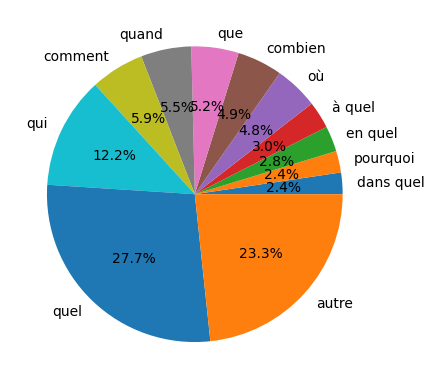

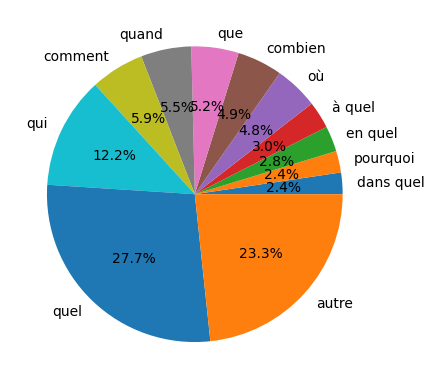

In [35]:
fig, ax = plt.subplots()
sizes, labels = process_qtype(qdf_PIAF)
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
fig.savefig(os.path.join(os.environ['ROOT_PATH'], 'v1/piaf.svg'), format='svg')
fig, ax = plt.subplots()
sizes, labels = process_qtype(qdf_PIAF)
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
fig.savefig(os.path.join(os.environ['ROOT_PATH'], 'v1/piaf.pdf'), format='pdf', bbox_inches='tight')